In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
X = np.array([[34,108,64,88,99,51]])
Y = np.array([[5.00,17.00,11.00,8.00,14.00,5.00]])

Ybar = np.mean(Y)


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

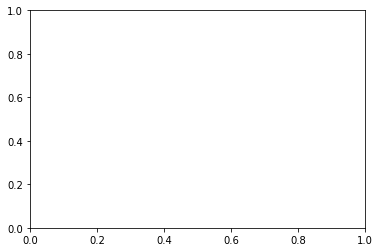

In [4]:
plt.scatter(X,Y,'red')
plt.plot(X,(X*0+Ybar),'green')
plt.show()

In [4]:
#Residuals(ERRORS) from the best fit line ybar=10+0(X) (Only considering Tip amount,Without the Bill amount)
Ybar = np.mean(Y) #Mean Tip amt
StdDevY = Y-Ybar 
StdDevY

array([[-5.,  7.,  1., -2.,  4., -5.]])

In [5]:
#calculate sum of Squared the residuals(SSE)
SSE = np.sum(StdDevY**2)
print("The Sum Squared Error is : "+ str(SSE))

SST = SSE
print("The Sum Squared Error is EQUAL to Total Sum squared Error SST : SST = SSE")


The Sum Squared Error is : 120.0
The Sum Squared Error is EQUAL to Total Sum squared Error SST : SST = SSE


In [6]:
#Finding the Centroid for the best fit line (Now taking bill amount into consideration)
Ybar = np.mean(Y) #Mean Tip amt

Xbar = np.mean(X) #Mean Bill amt
print('Centroid through which the Regression line will go : ('+ str(Ybar) +','+str(Xbar)+')')

Centroid through which the Regression line will go : (10.0,74.0)


In [7]:
#Now we need the slop b1 and y-intercept b0 from yhat=b0 + b1(x)
#FIRST FIND SLOP b1

#b1=sum((x(i) - xbar)*(y(i)-ybar))/(sum((x(i) - xbar)^2))

b1 = np.sum((X-Xbar)*(Y-Ybar))/np.sum((X-Xbar)**2)

#Then  FIND y intercept b0 using the mean line equation Ybar= b0 + b1Xbar. HOOLLYYY (y-y1)=m(x-x1)

b0 = Ybar-(Xbar*b1)

print("Slope b1 and intercept b0 for regression line " +str(b1)+' '+str(b0))

print("Regression line equation Yhat = b0 + b1*x is : Yhat = " +str(b1)+' + '+str(b0)+' * x')


Slope b1 and intercept b0 for regression line 0.14621968616262482 -0.8202567760342365
Regression line equation Yhat = b0 + b1*x is : Yhat = 0.14621968616262482 + -0.8202567760342365 * x


In [8]:
#Now calculate the Predicted Yhat (TIPS) using the Regression line equation
Yhat = b1 + (X*b1)
print(Yhat)

[[ 5.11768902 15.93794579  9.5042796  13.01355207 14.62196862  7.60342368]]


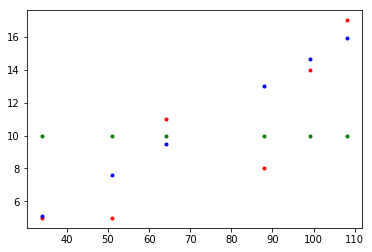

In [9]:
plt.plot(X,Y,'.r')#Actual data
#Mean line which is the best estimate with only 1 Dependant var TIPS for pridiction.It has MAX SSE = SST
plt.plot(X,(X*0+Ybar),'.g')
plt.plot(X,Yhat,'.b')#Regression Line Prediction
plt.show()

In [10]:
# With both Dependant var (TIPS) and Independant var (Bill amt) the TOTAL SUM OF SQUARES (SST) remains the same
SST = 120
print('TOTAL SUM OF SQUARES (SST) : ' + str(SST))
# BUT after regression, the sum squred error SSE is reduced significantly. The better the model fits the data the 
# lesser is  the SSE.
# The difference between SST and SSE is called SSR sum of squares due to regression.SST = SSE + SSR
SSE = np.sum((Y-Yhat)**2)
print('Sum Squared Error wrt regression line (SSE): ' + str(SSE))
# Notice that the SSE reduced from 120 to 35
SSR = SST - SSE
print('Sum Squares due to regression (SSR): ' + str(SSR))
# Notice that the SSE reduced from 120 to 35


TOTAL SUM OF SQUARES (SST) : 120
Sum Squared Error wrt regression line (SSE): 35.679353521869096
Sum Squares due to regression (SSR): 84.3206464781309


#The Coeffecient of Determination tells how well does the estimated regression equation fit our data

R_Square=SSR/SST

In [11]:
R_Square=SSR/SST
print('The Coeffecient of Determination : '+str(R_Square))

The Coeffecient of Determination : 0.7026720539844241


In [13]:
# MSE s² is estimate of population variance sigma² of error epsilon How spread are points from reg line
MSE = SSE/(6-2)
MSE

8.919838380467274

In [14]:
# s is standard error sigma
s=np.sqrt(MSE)
s

2.9866098473800147

In [15]:
print('SSE : ' + str(SSE))
print('MSE : ' + str(MSE))
print('Standard error(deviation) : ' + str(s))


SSE : 35.679353521869096
MSE : 8.919838380467274
Standard error(deviation) : 2.9866098473800147


#Since everything is an estimate here we need to know the CI for each estimator

b1 = slope estimate for pop regresion line

b0 = intercept estimate for pop regression line

Centroid - (Xbar,Ybar) = mean of each variable

The mean value of Yhat for any value of x (confidence interval)

The individual value of Yhat for any value of x (prediction interval)

Also variance etc etc

### Confidence Interval for slope b1 with 95% CL
b1 +- t alpha/2 * sb1 where sb1 is std dev of slope

sb1= s/(sqrt(sum(Xi - Xbar)²))


In [26]:
print("Slope b1 of regression line :" +str(b1))
sb1=s/(np.sqrt(np.sum((X-Xbar)**2)))
print('Standard error for slope : ' + str(sb1))

print('95 % Confidence interval for slope b1 : (' + str(b1-(2.776 * sb1))+' , '+str(b1+(2.776 * sb1))+')')

Slope b1 of regression line :0.14621968616262482
Standard error for slope : 0.04605150825303429
95 % Confidence interval for slope b1 : (0.01838069925220162 , 0.274058673073048)


The Slope CI doesnot contain 0 . 

t test of significance =>  H0:= B1 = 0    H1:= B1 != 0

